In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import cifar10
import matplotlib.pyplot as plt


In [ ]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_train_gray = tf.image.resize(x_train_gray, size=(28, 28))

x_test_gray = tf.image.rgb_to_grayscale(x_test)
x_test_gray = tf.image.resize(x_test_gray, size=(28, 28))


In [ ]:
x_train_gray, x_test_gray = x_train_gray / 255.0, x_test_gray / 255.0


In [ ]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)


In [ ]:
CNN = Sequential(name="Sequential_CNN")

CNN.add(Conv2D(16, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(28, 28, 1)))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Conv2D(32, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Flatten())
CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

CNN.summary()



Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)             

In [ ]:
CNN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [ ]:
history = CNN.fit(x_train_gray, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
704/704 [==============================] - 10s 12ms/step - loss: 1.9719 - accuracy: 0.2839 - val_loss: 1.7801 - val_accuracy: 0.3488
Epoch 2/10
704/704 [==============================] - 7s 10ms/step - loss: 1.6920 - accuracy: 0.3890 - val_loss: 1.6221 - val_accuracy: 0.4154
Epoch 3/10
704/704 [==============================] - 8s 12ms/step - loss: 1.6012 - accuracy: 0.4217 - val_loss: 1.5956 - val_accuracy: 0.4242
Epoch 4/10
704/704 [==============================] - 8s 11ms/step - loss: 1.5292 - accuracy: 0.4513 - val_loss: 1.4902 - val_accuracy: 0.4676
Epoch 5/10
704/704 [==============================] - 7s 11ms/step - loss: 1.4798 - accuracy: 0.4698 - val_loss: 1.4769 - val_accuracy: 0.4666
Epoch 6/10
704/704 [==============================] - 8s 12ms/step - loss: 1.4421 - accuracy: 0.4862 - val_loss: 1.4304 - val_accuracy: 0.4786
Epoch 7/10
704/704 [==============================] - 8s 11ms/step - loss: 1.4137 - accuracy: 0.4968 - val_loss: 1.4481 - val_accuracy: 0.482

In [ ]:
test_loss, test_accuracy = CNN.evaluate(x_test_gray, y_test)
print(f'Test accuracy: {test_accuracy}')


313/313 [==============================] - 1s 3ms/step - loss: 1.3741 - accuracy: 0.5164
Test accuracy: 0.5163999795913696


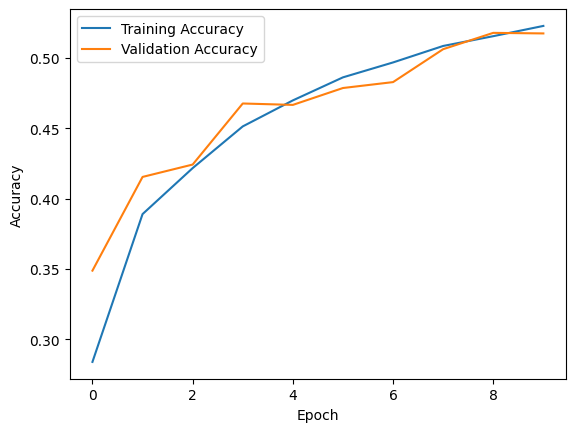

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()